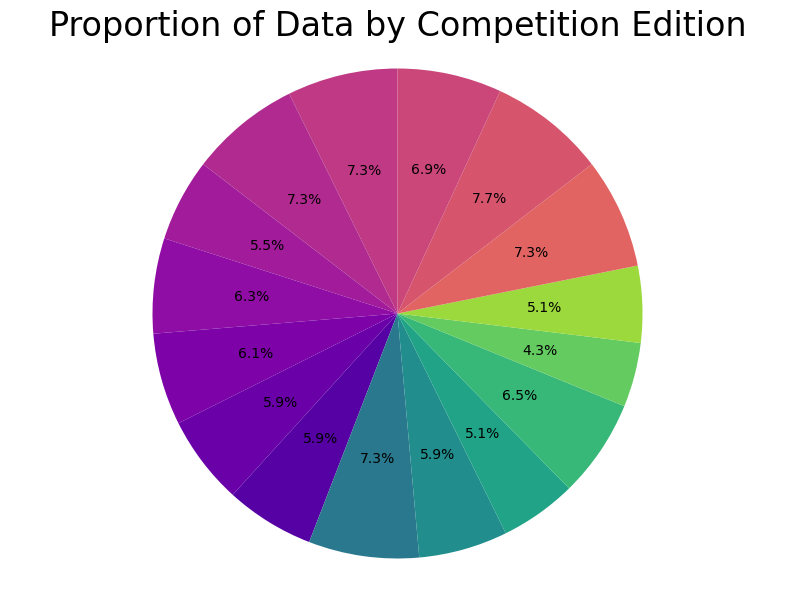

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("Competition Final List.xlsx", sheet_name="DedupedList")
competition_counts = df.groupby("Edition")["Competitor Name"].count()
competitions = competition_counts.index.tolist()
counts = competition_counts.tolist()

cliburn_indices = [i for i, name in enumerate(competitions) if "Cliburn" in str(name)]
other_indices = [i for i in range(len(competitions)) if i not in cliburn_indices]

def extract_edition_number(name):
    import re
    match = re.search(r'(\d+)(?:th|st|nd|rd)', name)
    return int(match.group(1)) if match else float('inf')

cliburn_names = [competitions[i] for i in cliburn_indices]
sorted_cliburn = sorted(cliburn_names, key=extract_edition_number)
cliburn_colors_sorted = plt.cm.plasma_r(np.linspace(0.4, 0.85, len(cliburn_indices)))
cliburn_color_map = {name: color for name, color in zip(sorted_cliburn, cliburn_colors_sorted)}
other_colors = plt.cm.viridis(np.linspace(0.4, 0.85, len(other_indices)))

colors = []
other_ptr = 0

#when you hover over a slice of the pie, it shows the label of the competition
for i, comp in enumerate(competitions):
    if i in cliburn_indices:
        colors.append(cliburn_color_map[comp])
    else:
        colors.append(other_colors[other_ptr])
        other_ptr += 1

plt.figure(figsize=(10, 7))
plt.pie(counts, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Data by Competition Edition', fontsize=24)
plt.axis('equal')
plt.show()
